In [1]:
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

In [2]:
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

C:\Users\the_s\Documents\python_projects\github\glm\glm


In [3]:
import bootstrapped_pred_conf_interval as bpci
import general_linear_model as glm
import prediction_confidence_interval as pci

# 1D Example

In [4]:
beta_actual = np.array([0.5, 2.28901, np.pi])
basis_funcs = ([lambda x:x, np.sin, np.tanh],)

n = 5000
seed = 37
rng = np.random.default_rng(seed)
X = rng.uniform(low=-10, high=10, size=n).reshape((-1,1))
y_noise = 20 * (2 * rng.uniform(size=X.shape[0]) - 1)
y = glm.GLM.func_glm(
    basis_funcs,
    beta_actual,
    X
) + y_noise

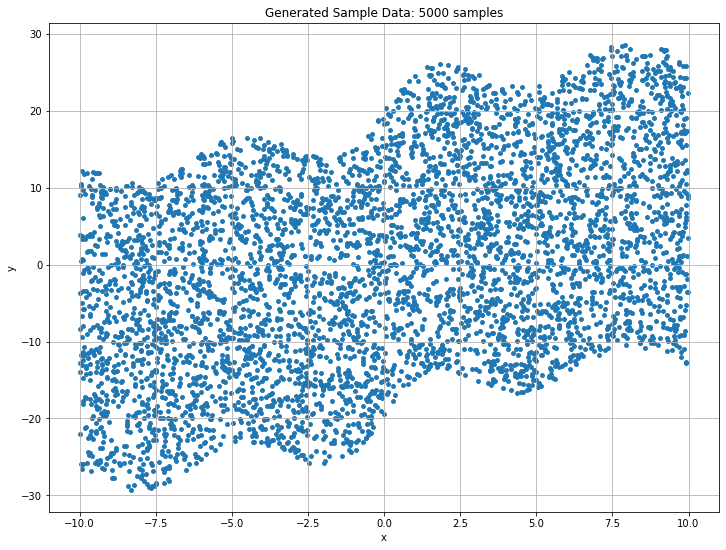

In [5]:
plt.figure(figsize=(12, 9))
plt.grid()
plt.scatter(X[:, 0], y, s=15)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Generated Sample Data: {n} samples')
plt.show()

In [ ]:
model = glm.GLM(basis_funcs=basis_funcs)
model.fit(X, y, sample_weights=None)

In [ ]:
n2 = 1000
x_fit = np.linspace(-10, 10, n2).reshape(-1, 1)
y_fit = model.predict(x_fit)

In [ ]:
plt.figure(figsize=(12, 9))
plt.grid()
plt.scatter(X[:, 0], y, s=15)
plt.plot(x_fit[:, 0], y_fit, lw=3, color='red', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data: {n} samples')
plt.legend()
plt.show()

In [ ]:
print(
    f'{model.dof} -- degrees of freedom\n'
    f'{model.sigma_sqrd} -- sigma squared\n'
    f'{model.beta} -- optimal beta\n'
    f'{model.var_beta}\n -- variance of beta\n'
)

In [ ]:
interval_type = 'prediction'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None
)

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.scatter(X[:, 0], y, s=12)
plt.plot(x_fit, glm.GLM.func_glm(model.basis_funcs, beta_actual, x_fit), lw=3, color='green', label='actual')
plt.plot(x_fit, y_fit, lw=3, color='red', label='fit')
plt.plot(x_fit, y_fit - pred_conf_interval, color='purple', linestyle='--', label=f'{interval_type} interval')
plt.plot(x_fit, y_fit + pred_conf_interval, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data and Actuals with {interval_type} Intervals: {n} samples')
plt.legend()
plt.show()

In [ ]:
interval_type = 'confidence'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None
)

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.scatter(X[:, 0], y, s=12)
plt.plot(x_fit, glm.GLM.func_glm(model.basis_funcs, beta_actual, x_fit), lw=3, color='green', label='actual')
plt.plot(x_fit, y_fit, lw=3, color='red', label='fit')
plt.plot(x_fit, y_fit - pred_conf_interval, color='purple', linestyle='--', label=f'{interval_type} interval')
plt.plot(x_fit, y_fit + pred_conf_interval, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data and Actuals with {interval_type} Intervals: {n} samples')
plt.legend()
plt.show()

In [ ]:
interval_type = 'prediction'

var_f_bs, pred_conf_interval_bs = bpci.bootstrap_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None,
    nbootstraps=50,
    resample_frac=0.7
)

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.scatter(X[:, 0], y, s=12)
plt.plot(x_fit, glm.GLM.func_glm(model.basis_funcs, beta_actual, x_fit), lw=3, color='green', label='actual')
plt.plot(x_fit, y_fit, lw=3, color='red', label='fit')
plt.plot(x_fit, y_fit - pred_conf_interval_bs, color='purple', linestyle='--', label=f'{interval_type} interval')
plt.plot(x_fit, y_fit + pred_conf_interval_bs, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data and Actuals with Bootstrapped {interval_type} Intervals: {n} samples')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 9))
plt.grid()
plt.scatter(var_f, var_f_bs, s=4)
plt.plot(
    np.linspace(0, max(var_f.max(), var_f_bs.max()), 10),
    np.linspace(0, max(var_f.max(), var_f_bs.max()), 10),
    linestyle='--',
    color='black',
    lw=2
  )
plt.xlabel('actual variance')
plt.ylabel('bootstrapped variance')
plt.title('Comparison of Variance: Actual vs Bootstrapped')
plt.show()

# 3D Example

In [ ]:
beta_actual = np.array([0.5, 2.28901, np.pi, -1.5])
basis_funcs = ([lambda x:x, np.sin, np.tanh], [lambda y: y**2])

In [ ]:
n = 1000
X = np.concatenate(
    [rng.uniform(low=-10, high=10, size=n).reshape(-1,1)
     for i in range(len(basis_funcs))],
    axis=1
)
y_noise = 20 * (2 * rng.uniform(size=X.shape[0]) - 1)
y = glm.GLM.func_glm(basis_funcs, beta_actual, X) + y_noise

In [ ]:
for i in range(len(basis_funcs)):
    plt.figure(figsize=(12, 9))
    plt.grid()
    plt.scatter(X[:, i], y, s=15)
    plt.xlabel(f'x{i}')
    plt.ylabel('y')
    plt.title(f'2D Slice of Generated Sample Data: {n} samples')
    plt.show()
    del i

In [ ]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, s=50)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Generated Sample Data: {n} samples')
plt.show()
del ax, fig

In [ ]:
model = glm.GLM(basis_funcs=basis_funcs)
model.fit(X, y, sample_weights=None)

In [ ]:
n2 = 1000
x_fit =  np.concatenate(
    [np.linspace(-10, 10, n2).reshape(-1, 1)
     for i in range(len(basis_funcs))],
    axis=1
)
y_fit = model.predict(x_fit)

In [ ]:
xx1, xx2 = np.meshgrid(x_fit[:, 0], x_fit[:, 1])
xx = np.concatenate(
    [xx1.reshape(*xx1.shape, 1), xx2.reshape(*xx1.shape, 1)],
    axis=2
).reshape(xx1.shape[0] * xx1.shape[1], 2)
yy = model.predict(xx).reshape(*xx1.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20, 20))
ax.scatter(X[:, 0], X[:, 1], y, s=80, color='grey')
surf = ax.plot_surface(
    xx1,
    xx2,
    yy,
    linewidth=0, 
    antialiased=False,
    alpha=0.4
)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Fitted Sample Data: {n} samples')
plt.show()
del fig, ax, surf

In [ ]:
print(
    f'{model.dof} -- degrees of freedom\n'
    f'{model.sigma_sqrd} -- sigma squared\n'
    f'{model.beta} -- optimal beta\n'
    f'{model.var_beta}\n -- variance of beta\n'
)

In [ ]:
interval_type = 'prediction'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None
)
print(pred_conf_interval.shape)

In [ ]:
prev_mbfs_len = 0
for i in range(len(basis_funcs)):
    mbfs = model.basis_funcs[i]
    ba = beta_actual[prev_mbfs_len:prev_mbfs_len + len(mbfs)]
    mba = model.beta[prev_mbfs_len:prev_mbfs_len + len(mbfs)]
    print(ba)
    plt.figure(figsize=(16, 12))
    plt.grid()
    plt.scatter(X[:, i], y, s=12)
    plt.plot(
        x_fit[:, i],
        glm.GLM.func_glm((mbfs,), ba, x_fit[:, i].reshape(-1,1)),
        lw=3,
        color='green',
        label='actual'
    )
    plt.plot(
        x_fit[:, i],
        glm.GLM.func_glm((mbfs,), mba, x_fit[:, i].reshape(-1,1)),
        lw=3,
        color='red',
        label='fit'
    )
    plt.plot(
        x_fit[:, i],
        glm.GLM.func_glm((mbfs,), mba, x_fit[:, i].reshape(-1,1)) - pred_conf_interval,
        color='purple',
        linestyle='--',
        label=f'{interval_type} interval'
    )
    plt.plot(
        x_fit[:, i],
        glm.GLM.func_glm((mbfs,), mba, x_fit[:, i].reshape(-1,1)) + pred_conf_interval,
        color='purple',
        linestyle='--'
    )
    plt.xlabel(f'x{i}')
    plt.ylabel('y')
    plt.title(f'Fitted Sample Data and Actuals with {interval_type} Intervals: {n} samples')
    plt.legend()
    plt.show()
    
    prev_mbfs_len = len(mbfs)
    del i, mbfs, ba
del prev_mbfs_len

In [ ]:
interval_type = 'prediction'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=xx,
    interval_type=interval_type, 
    significance_level=None
)
print(pred_conf_interval.shape)

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(20, 20))
ax.scatter(X[:, 0], X[:, 1], y, s=80, color='grey')
surf = ax.plot_surface(
    xx1,
    xx2,
    yy,
    linewidth=0, 
    antialiased=False,
    alpha=0.4
)
surf = ax.plot_surface(
    xx1,
    xx2,
    yy - pred_conf_interval.reshape(yy.shape),
    linewidth=0, 
    antialiased=False,
    alpha=0.15,
    color='purple'
)
surf = ax.plot_surface(
    xx1,
    xx2,
    yy + pred_conf_interval.reshape(yy.shape),
    linewidth=0, 
    antialiased=False,
    alpha=0.15,
    color='purple'
)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title(f'Fitted Sample Data with {interval_type} Intervals: {n} samples')
plt.show()
del fig, ax, surf

# Example Using Non Ideal Basis Functions

In [ ]:
beta_actual = np.array([0.5, 2.28901, np.pi])
basis_funcs_actual = ([lambda x:x, np.sin, np.tanh],)

n = 5000
rng = np.random.default_rng(seed)
X = rng.uniform(low=-10, high=10, size=n).reshape((-1,1))
y_noise = 20 * (2 * rng.uniform(size=X.shape[0]) - 1)
y = glm.GLM.func_glm(
    basis_funcs_actual,
    beta_actual,
    X
) + y_noise

In [ ]:
basis_funcs = ([lambda x:x, np.sin, np.cos, np.exp, lambda x: np.exp(-x), lambda x: 1 / (1 + np.exp(-x))],)

model = glm.GLM(basis_funcs=basis_funcs)
model.fit(X, y, sample_weights=None)

In [ ]:
print(
    f'{model.dof} -- degrees of freedom\n'
    f'{model.sigma_sqrd} -- sigma squared\n'
    f'{model.beta} -- optimal beta\n'
    f'{model.var_beta}\n -- variance of beta\n'
)

In [ ]:
n2 = 1000
x_fit = np.linspace(-10, 10, n2).reshape(-1, 1)
y_fit = model.predict(x_fit)

In [ ]:
interval_type = 'prediction'

var_f, pred_conf_interval = pci.glm_pred_conf_interval(
    model,
    X, 
    y, 
    sample_weights=None,
    x_test=x_fit,
    interval_type=interval_type, 
    significance_level=None
)

In [ ]:
plt.figure(figsize=(16, 12))
plt.grid()
plt.scatter(X[:, 0], y, s=12)
plt.plot(x_fit, glm.GLM.func_glm(basis_funcs_actual, beta_actual, x_fit), lw=3, color='green', label='actual')
plt.plot(x_fit, y_fit, lw=3, color='red', label='fit')
plt.plot(x_fit, y_fit - pred_conf_interval, color='purple', linestyle='--', label=f'{interval_type} interval')
plt.plot(x_fit, y_fit + pred_conf_interval, color='purple', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Fitted Sample Data and Actuals with {interval_type} Intervals: {n} samples')
plt.legend()
plt.show()